# Assignment 6 : Clustering using k-means

In [1]:
from google.colab import files
upload = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [5]:
import pandas as pd

mall_customer_data = pd.read_csv("Mall_Customers.csv")

mall_customer_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##**2. Data cleaning**

In [3]:
mall_customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
mall_customer_data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [13]:
df2 = mall_customer_data.loc[mall_customer_data['Spending Score (1-100)'] > 100 ]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              0 non-null      int64 
 1   Gender                  0 non-null      object
 2   Age                     0 non-null      int64 
 3   Annual Income (k$)      0 non-null      int64 
 4   Spending Score (1-100)  0 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 0.0+ bytes


In [14]:
mall_customer_data.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


1. There is no duplicate data
2. There is no irrelevant data
3. There is no incorrect data
4. There is no strutural errors
5. There is no missing data

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

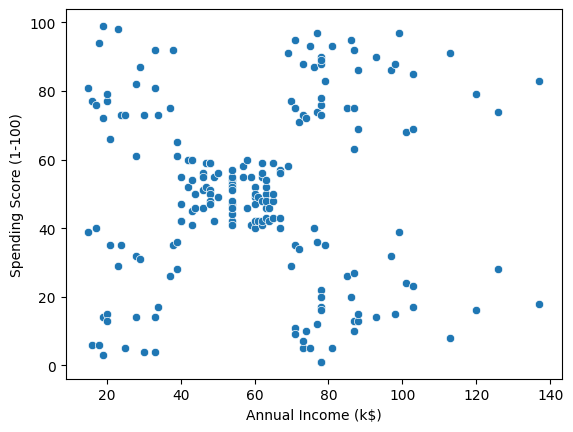

In [16]:
import seaborn as sns # seaborn library

sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=mall_customer_data)

##**3. Grouping customers**

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

###**3.1 Using one suitable feature**

#####A. Using Elbow Method

In [43]:
x_axis = mall_customer_data[['Annual Income (k$)']]

In [44]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_axis)
    sse.append(kmeans.inertia_)


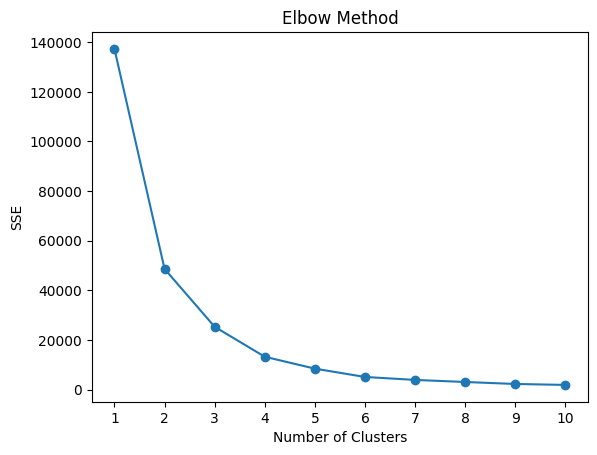

In [73]:
plt.title('Elbow Method')
plt.plot(range(1, 11), sse, marker='o')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

From the above plot, we can see that the elbw bend appears when the nummber of clusters is **3**.

In [121]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)
kmeans.fit(x_axis)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [122]:
annual_inccome_data_clustered = x_axis.copy()
annual_inccome_data_clustered['cluster'] = kmeans.labels_
annual_inccome_data_clustered.head(5)

,Annual Income (k$),cluster
0,15,1
1,15,1
2,16,1
3,16,1
4,17,1


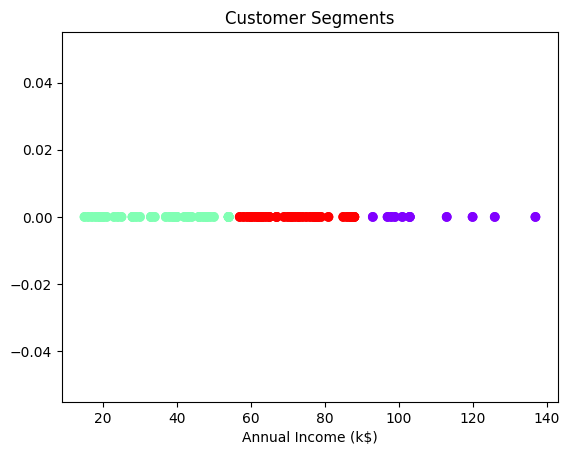

In [123]:
plt.scatter(annual_inccome_data_clustered['Annual Income (k$)'],
            [0]*len(annual_inccome_data_clustered),
            c=annual_inccome_data_clustered['cluster'], cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.title('Customer Segments')
plt.show()

The above plot is one dimensional because we are using one feature (annual income) of the dataset.

#####B. Using the sihlouette scores verifications

In [113]:
silhouette_scores = []
for k in range(2, 11) : # Seems like the silhouette score is undefined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_axis)
    labels = kmeans.labels_
    score = silhouette_score(x_axis, labels)
    silhouette_scores.append(score)
    print(f"For k={k}, Silhouette Score={score:.3f}")

For k=2, Silhouette Score=0.543
For k=3, Silhouette Score=0.519
For k=4, Silhouette Score=0.549
For k=5, Silhouette Score=0.566
For k=6, Silhouette Score=0.602
For k=7, Silhouette Score=0.558
For k=8, Silhouette Score=0.609
For k=9, Silhouette Score=0.606
For k=10, Silhouette Score=0.603


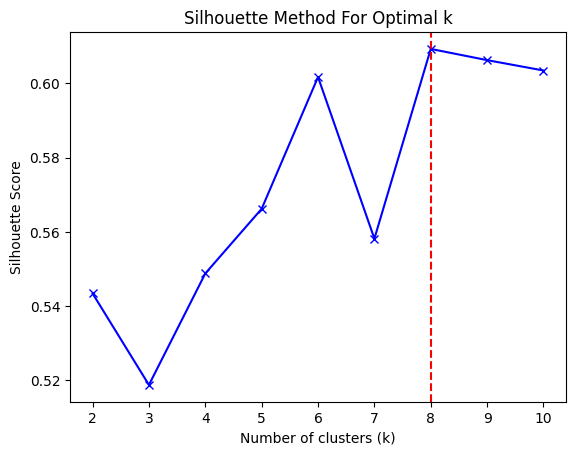

In [124]:
plt.plot(range(2,11), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.axvline(x=8, color='red', linestyle='--', label='k = 8')
plt.show()


In this case, 8 is the optimal.

This is a confusing result

###**3.2 Using two suitable feature**: Annual Income and Spending Score

In [75]:
income_speding_score = mall_customer_data.loc[:,['Annual Income (k$)','Spending Score (1-100)']]

#####A. Elbow Method

In [76]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(income_speding_score)
    sse.append(kmeans.inertia_)


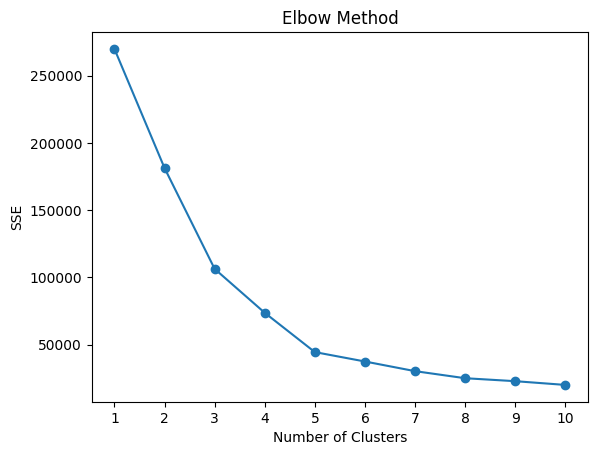

In [77]:
plt.title('Elbow Method')
plt.plot(range(1, 11), sse, marker='o')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Let's say the optimal number of clusters is **5**

In [100]:
kmeans = KMeans(init="random", n_clusters=5, n_init=10, random_state=42)
kmeans.fit(income_speding_score)
kmeans.labels_

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [101]:
income_speding_score_clustered = income_speding_score.copy()
income_speding_score_clustered['cluster'] = kmeans.labels_
income_speding_score_clustered.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,0
1,15,81,1
2,16,6,0
3,16,77,1
4,17,40,0


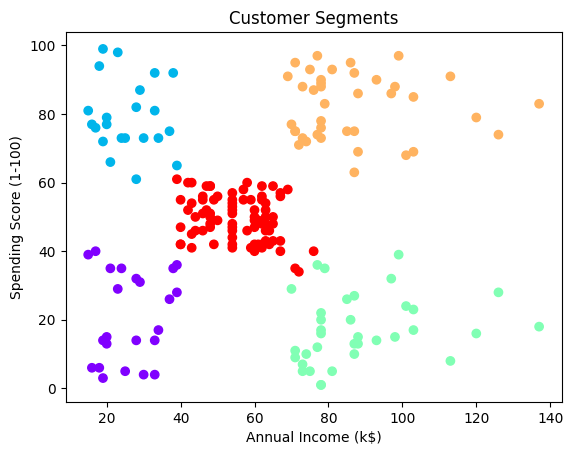

In [102]:
plt.scatter(income_speding_score_clustered['Annual Income (k$)'],
            income_speding_score_clustered['Spending Score (1-100)'],
            c=income_speding_score_clustered['cluster'], cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.show()

#####B. Silhouette Method

In [107]:
silhouette_scores = []

for k in range(2, 11) : # Seems like the silhouette score is undefined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(income_speding_score)
    labels = kmeans.labels_
    score = silhouette_score(income_speding_score, labels)
    silhouette_scores.append(score)
    print(f"For k={k}, Silhouette Score={score:.3f}")

For k=2, Silhouette Score=0.396
For k=3, Silhouette Score=0.468
For k=4, Silhouette Score=0.494
For k=5, Silhouette Score=0.554
For k=6, Silhouette Score=0.513
For k=7, Silhouette Score=0.502
For k=8, Silhouette Score=0.496
For k=9, Silhouette Score=0.456
For k=10, Silhouette Score=0.443


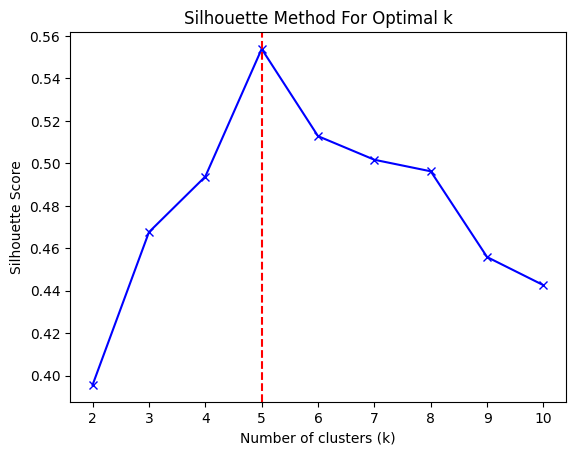

In [110]:
plt.plot(range(2,11), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.axvline(x=5, color='red', linestyle='--', label='k = 5')
plt.show()

The higher the value of the silhouette score, the better. So 5 is our optimal number of clusters.